## Main Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mis
import os
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")


# pr-eprocessing 
from sklearn.pipeline import Pipeline , FeatureUnion
from sklearn_features.transformers import DataFrameSelector
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.impute import SimpleImputer


# model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split , cross_val_score , cross_val_predict , GridSearchCV , RandomizedSearchCV

from sklearn.metrics import mean_squared_error
import xgboost as xgb
from keras import Sequential , layers


In [85]:
## Show some data 
pathfile = "D:\ML_data\gold price data.csv"

if os.path.exists(pathfile):
    df = pd.read_csv(pathfile)
    print(df.head())
    
else:
    print("Sorry , your file not found.")


       Date          SPX        GLD        USO     SLV   EUR/USD
0  1/2/2008  1447.160034  84.860001  78.470001  15.180  1.471692
1  1/3/2008  1447.160034  85.570000  78.370003  15.285  1.474491
2  1/4/2008  1411.630005  85.129997  77.309998  15.167  1.475492
3  1/7/2008  1416.180054  84.769997  75.500000  15.053  1.468299
4  1/8/2008  1390.189941  86.779999  76.059998  15.590  1.557099


In [3]:
df.head()

Date          SPX        GLD        USO     SLV   EUR/USD
0  1/2/2008  1447.160034  84.860001  78.470001  15.180  1.471692
1  1/3/2008  1447.160034  85.570000  78.370003  15.285  1.474491
2  1/4/2008  1411.630005  85.129997  77.309998  15.167  1.475492
3  1/7/2008  1416.180054  84.769997  75.500000  15.053  1.468299
4  1/8/2008  1390.189941  86.779999  76.059998  15.590  1.557099

In [4]:
df.tail()

Date          SPX         GLD      USO      SLV   EUR/USD
2285   5/8/2018  2671.919922  124.589996  14.0600  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.3700  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.4100  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.3800  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.4058  15.4542  1.182033

## Data Overview:

## Dates: January 2nd to 8th, 2008 (5 trading days)
## Indices and Currency Pair:
## SPX: S&P 500 Index (US stock market)
## GLD: SPDR Gold Shares (gold ETF)
## USO: United States Oil Fund (oil ETF)
## SLV: iShares Silver Trust (silver ETF)
## EUR/USD: Euro-US Dollar exchange rate
## Key Trends:

## SPX: Declined from 1447 to 1390, indicating a 3.9% drop in the US stock market.
## GLD: Increased from 84.86 to 86.78, suggesting a 2.2% rise in gold prices.
## USO: Decreased from 78.47 to 76.06, reflecting a 3.1% drop in oil prices.
## SLV: Decreased from 15.18 to 15.05, indicating a 0.8% decline in silver prices.
## EUR/USD: Increased from 1.4717 to 1.5571, representing a 5.8% appreciation of the euro against the US dollar.

In [5]:
# Summary for Numerical columns
df.describe().T

count         mean         std         min          25%  \
SPX      2290.0  1654.315776  519.111540  676.530029  1239.874969   
GLD      2290.0   122.732875   23.283346   70.000000   109.725000   
USO      2290.0    31.842221   19.523517    7.960000    14.380000   
SLV      2290.0    20.084997    7.092566    8.850000    15.570000   
EUR/USD  2290.0     1.283653    0.131547    1.039047     1.171313   

                 50%          75%          max  
SPX      1551.434998  2073.010070  2872.870117  
GLD       120.580002   132.840004   184.589996  
USO        33.869999    37.827501   117.480003  
SLV        17.268500    22.882500    47.259998  
EUR/USD     1.303297     1.369971     1.598798

In [6]:
df.describe(include='object')  # Summary for categorical columns


Date
count       2290
unique      2290
top     1/2/2008
freq           1

In [7]:
df.nunique()

Date       2290
SPX        2277
GLD        1930
USO        1514
SLV        1331
EUR/USD    2066
dtype: int64

In [8]:
# show some details 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
df.shape

(2290, 6)

In [10]:
df.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

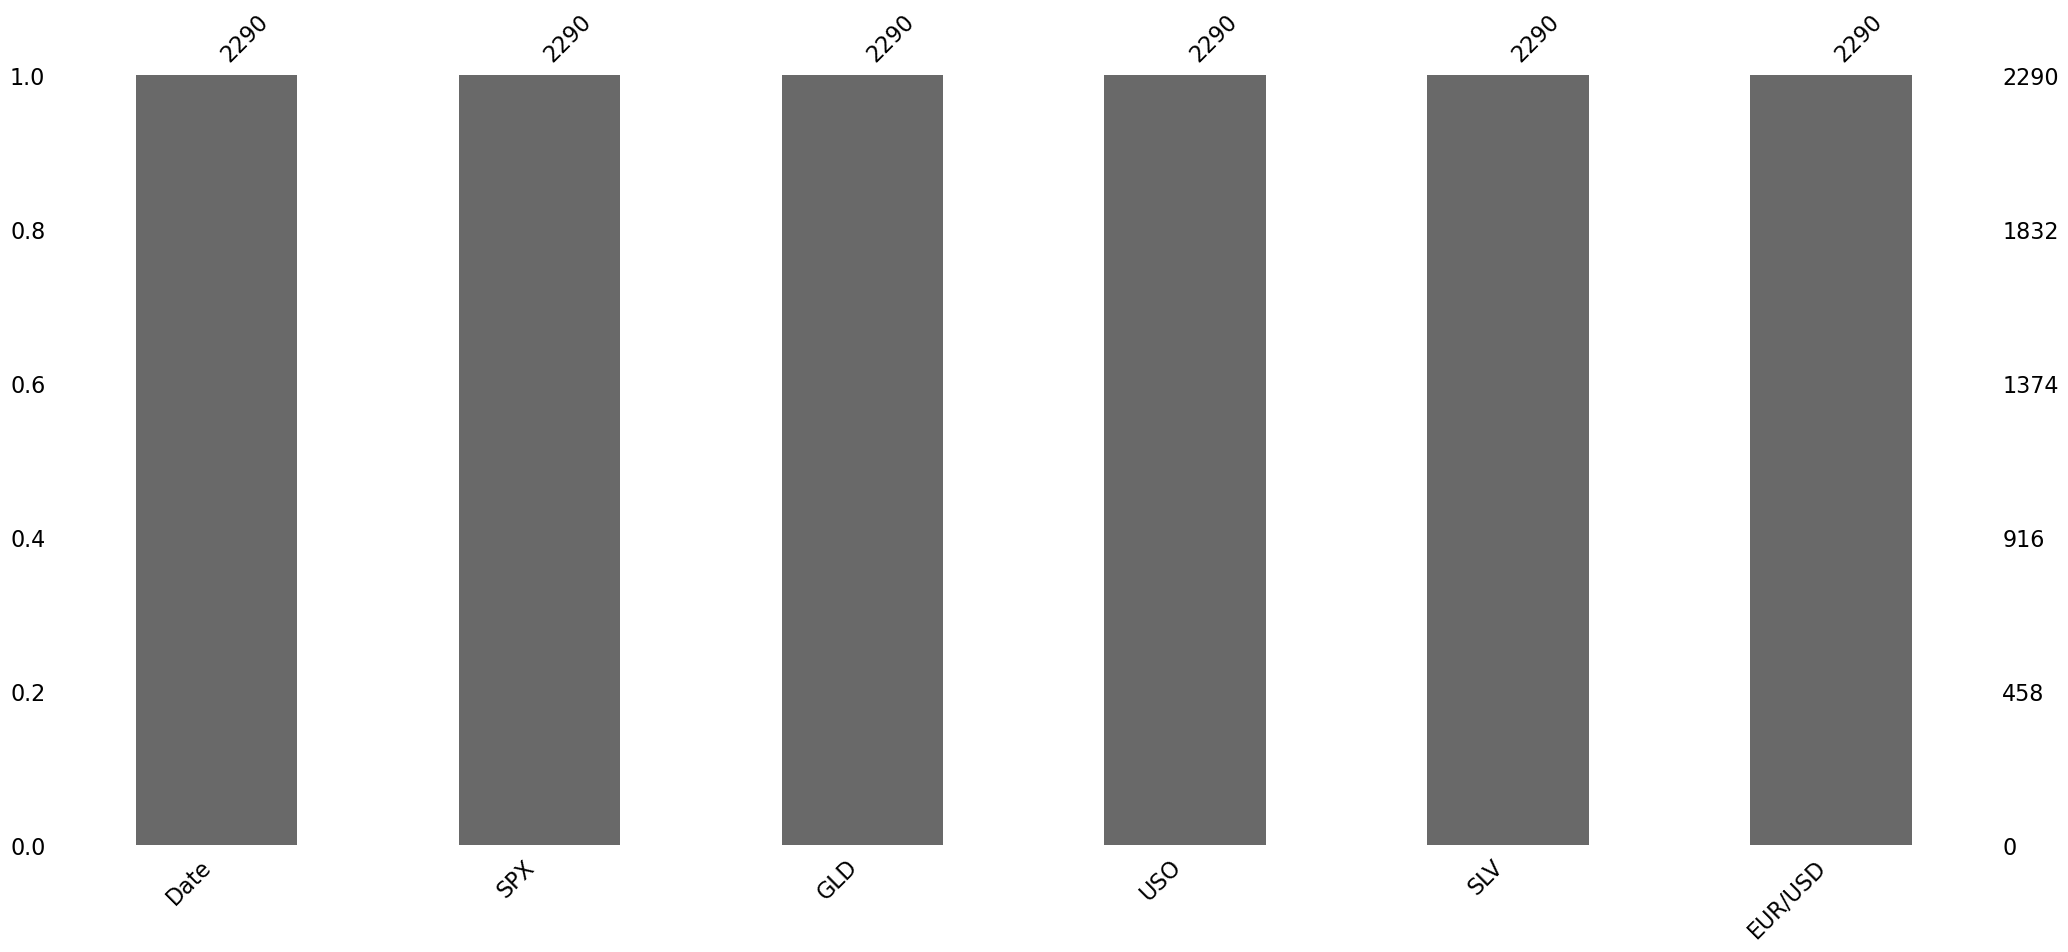

In [11]:
## check null 

mis.bar(df)
plt.show()

In [12]:
for i in df.columns:
    if i == "Date":
        continue
    print(i)
    

SPX
GLD
USO
SLV
EUR/USD


In [13]:
px.histogram(df[i])


In [14]:
px.box(df[i])


In [15]:
fig = px.scatter(df[i])
fig.show()

In [16]:
df.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [17]:
d = px.bar(df[i])
d.show()

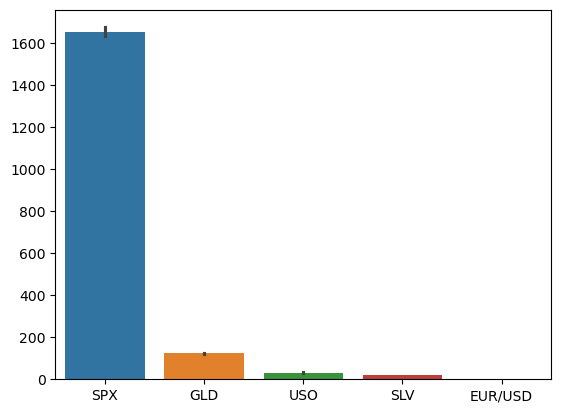

In [18]:
sns.barplot(df)
plt.show()

In [19]:
df.shape[1]

6

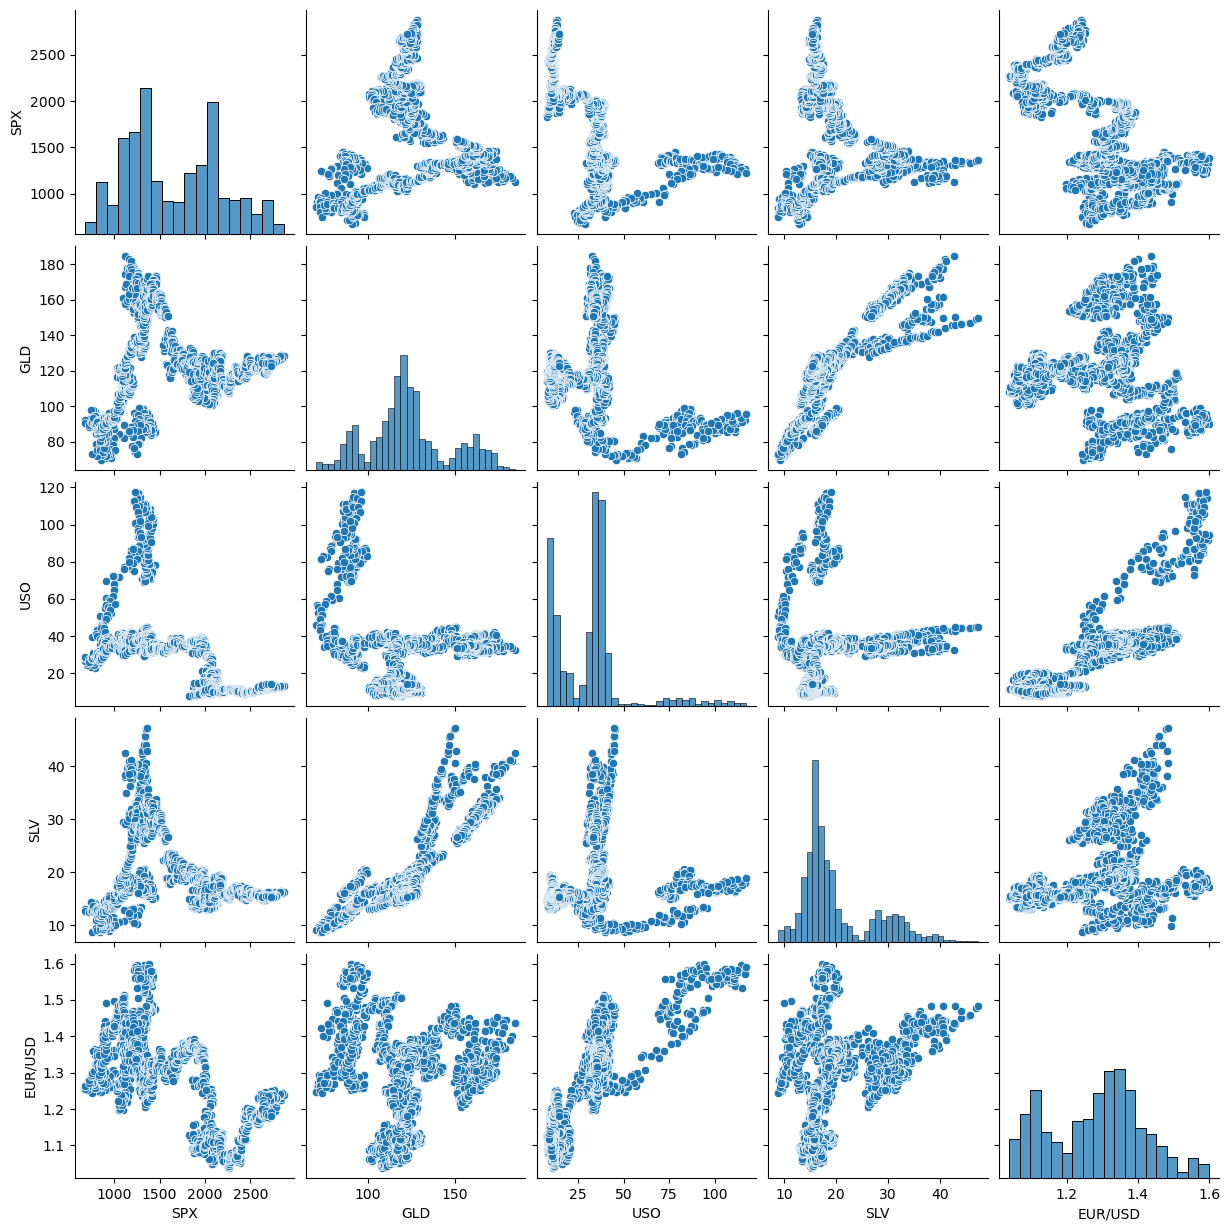

In [20]:
sns.pairplot(df)
plt.show()

In [21]:
df.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

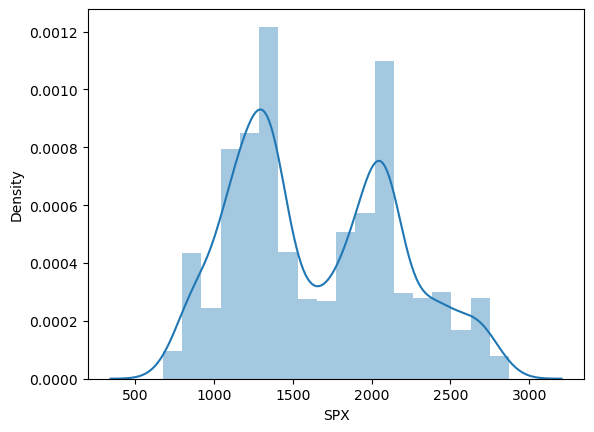

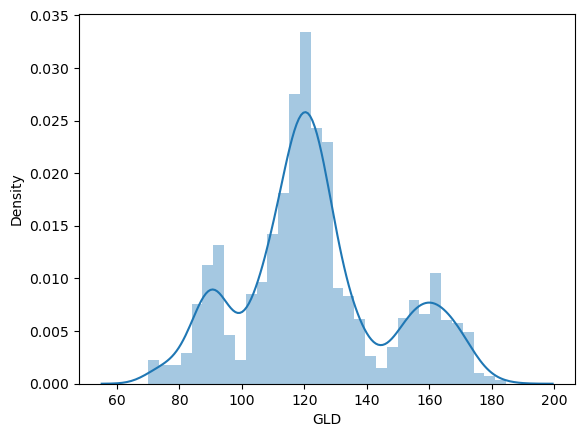

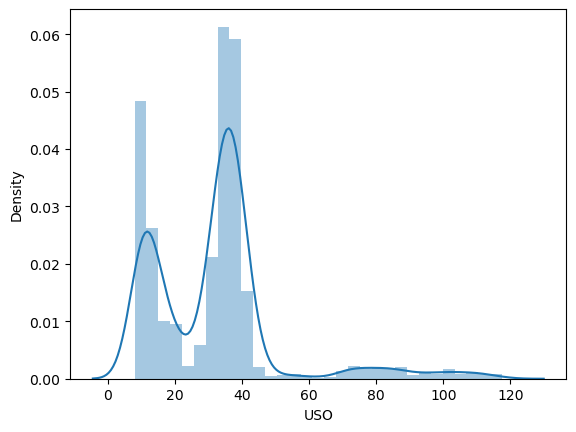

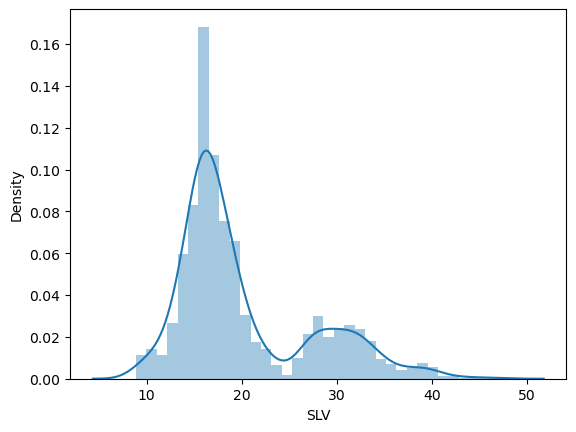

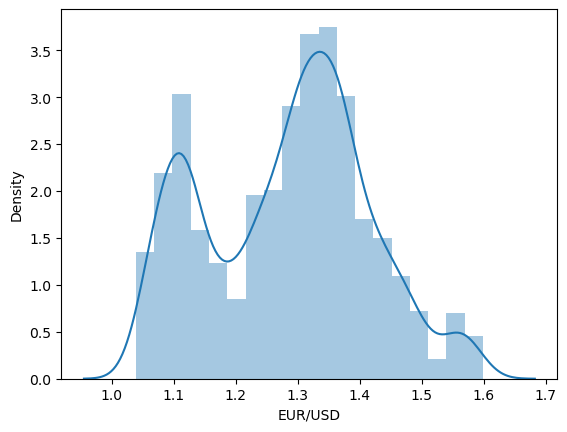

In [22]:
for i in df.columns:
    if i == "Date":
        continue
    else:
        sns.distplot(df[i])
        plt.show()

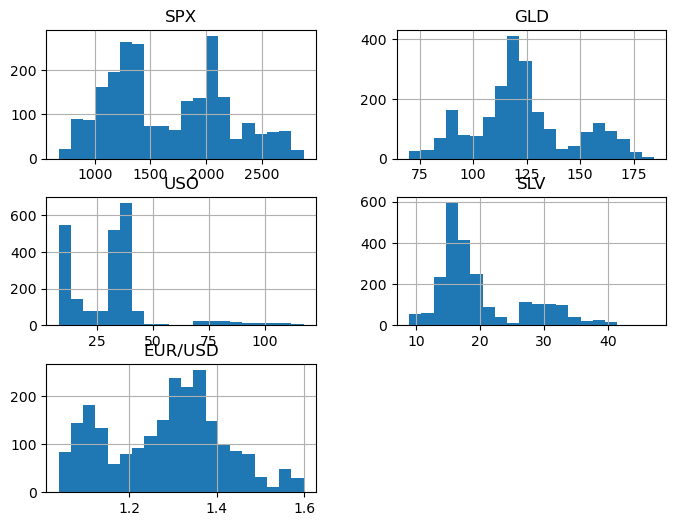

In [23]:
df.hist(figsize=(8,6) , bins=20)
plt.show()

In [24]:
# log transform

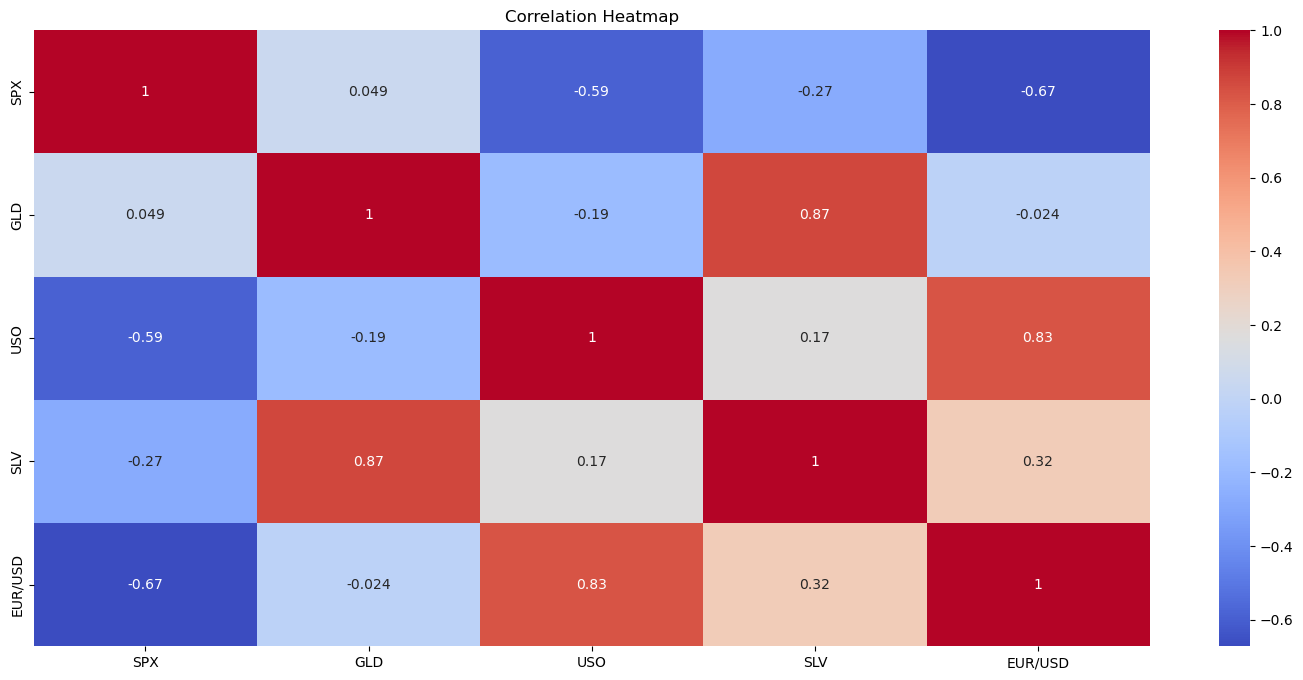

In [25]:
plt.figure(figsize=(18, 8))
sns.heatmap(df.corr() ,annot=True , cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [26]:
X = df.drop(columns=["EUR/USD"] , axis=1)
y = df["EUR/USD"]

In [27]:
X_train , X_test ,y_train , y_test = train_test_split(X , y , test_size=0.2 , shuffle=True , random_state=123)

In [28]:
print(f"the shape of X_train is {X_train.shape}")
print(f"the shape of X_test is {X_test.shape}")
print(f"the shape of y_train is {y_train.shape}")
print(f"the shape of y_test is {y_test.shape}")

the shape of X_train is (1832, 5)
the shape of X_test is (458, 5)
the shape of y_train is (1832,)
the shape of y_test is (458,)


In [29]:
col_nums = [col for col in X.columns if df[col].dtype in ["int32" , "int64" , "float32" , "float64"]]
col_catg = [col for col in X.columns if df[col].dtype not in ["int32" , "int64" , "float32" , "float64"]]

if (col_nums) and (col_catg):
    print(f" nums cols is \n {col_nums}")
    print(f" catg cols is \n {col_catg}")

elif col_catg:
        print(f" catg cols is \n {col_catg}")

else:
    print(f" nums cols is \n {col_nums}")


 nums cols is 
 ['SPX', 'GLD', 'USO', 'SLV']
 catg cols is 
 ['Date']


In [30]:
## Assuming "EUR/USD" is a valid column name
pip_num = Pipeline(steps=[("select", DataFrameSelector(col_nums)),
                           ("Simple", SimpleImputer(strategy="median")),
                           ("scaler", StandardScaler())])

# X_train_nums = pip_num.fit_transform(X_train , y_train)

In [31]:
pip_catg = Pipeline(steps=[
                 ("selector", DataFrameSelector(col_catg)),# ==> To select the categorical cols from the Data
                 ("Imputer", SimpleImputer(strategy="constant", fill_value="missing")),
                 ("one_hot", LabelEncoder())
                ])


In [32]:
def Preprocessing(cols_nums, col_catg, X_train, X_test):
    if cols_nums and col_catg:
        # total pipeline to concatenate the num_pipeline and cate_pipeline
        total_pipeline = FeatureUnion(transformer_list=[("num_pipeline", pip_num),
                                                        ("cate_pipeline", pip_catg)])

        # make fitting
        pip_num.fit(X_train)
        X_train_final= pip_num.transform(X_train)
        X_test_final =  pip_num.transform(X_test)

        return X_train_final, X_test_final

    elif col_catg == [] and cols_nums:
        # make fitting
        pip_num.fit(X_train)
        X_train_final= pip_num.transform(X_train)
        X_test_final =  pip_num.transform(X_test)

        return X_train_final, X_test_final

    else:
        # make fitting
        pip_num.fit(X_train)
        X_train_final= pip_num.transform(X_train)
        X_test_final =  pip_num.transform(X_test)

        return X_train_final, X_test_final



X_train_final, X_test_final = Preprocessing(col_nums, col_catg, X_train, X_test)
print(f"X_train_final is = {X_train_final}")
print("*"*50)
print(f"X_test_final is = {X_test_final}")


X_train_final is = [[-0.65187983  1.71509256  0.30710381  1.59075105]
 [-0.85943297  0.56635239  0.26196036  1.12325055]
 [-0.49316616 -1.51026723  3.44508592 -0.46510663]
 ...
 [ 0.63956305 -0.75838782 -1.09686205 -0.94261478]
 [-0.26330572  1.69611276  0.13656147  1.49782285]
 [ 0.33289758  0.13972631  0.19524805 -0.03048871]]
**************************************************
X_test_final is = [[-1.17185189 -0.92834772  0.37532086 -0.58519861]
 [ 1.92741226  0.18847143 -0.92581797 -0.63380721]
 [ 1.5486445  -0.01427309 -1.11642428 -0.5465978 ]
 ...
 [ 1.94580132  0.06035424 -1.0015589  -0.56661297]
 [ 0.94899989  0.21133404 -1.04268973 -0.12341691]
 [ 0.97102066 -0.0901941  -1.01861314 -0.46081778]]


# Model ML

# RandomForestRegressor

In [33]:
Random = RandomForestRegressor()


In [34]:
# Define the hyperparameter grid
hyper_params = {
    "n_estimators": [i for i in range(100 ,500 ,100)],
    "max_depth": [i for i in range(3,15,3)],
    "criterion": ["squared_error", "absolute_error", "friedman_mse", "poisson"],
}

# Create GridSearchCV object
random_hyper = GridSearchCV(
    estimator=Random,
    param_grid=hyper_params,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-1
)

# Fit the model
random_model = random_hyper.fit(X_train_final, y_train)


In [35]:
print(f"Best Parameter is \n {random_model.best_params_}")

Best Parameter is 
 {'criterion': 'squared_error', 'max_depth': 12, 'n_estimators': 200}


In [36]:
Rand_reg = random_model.best_estimator_
Rand_reg

RandomForestRegressor(max_depth=12, n_estimators=200)

In [68]:
cross_val = cross_val_score(estimator=Rand_reg , X=X_train_final , y=y_train ,
                            cv=5 , scoring="neg_mean_squared_error" , n_jobs=-1)

 
print("Score is ==>>\n ",abs(cross_val))

print("cross val score mean is ==>> ",cross_val.mean() * -1)

Score is ==>>
  [0.0003814  0.00039042 0.0002813  0.00051673 0.00037259]
cross val score mean is ==>>  0.0003884864140593212


In [38]:
# Make cross-validation predictions
cross_val_pred = cross_val_predict(estimator=Rand_reg, X=X_train_final, y=y_train,
                                   cv=5, method="predict", n_jobs=-1)

# Calculate mean squared error
mse = np.sqrt(mean_squared_error(y_train, cross_val_pred))

# Print the MSE
print(f"The mean squared error is {mse:.4f}")

The mean squared error is 0.0196


In [39]:
feat_import_forst = {}
for name , score in zip(col_nums , Rand_reg.feature_importances_[:6]):
    feat_import_forst[name] = score


In [40]:
keys_forst = feat_import_forst.keys()
values_forst = feat_import_forst.values()

In [41]:
X = pd.DataFrame({"features": keys_forst, "Scores": values_forst})


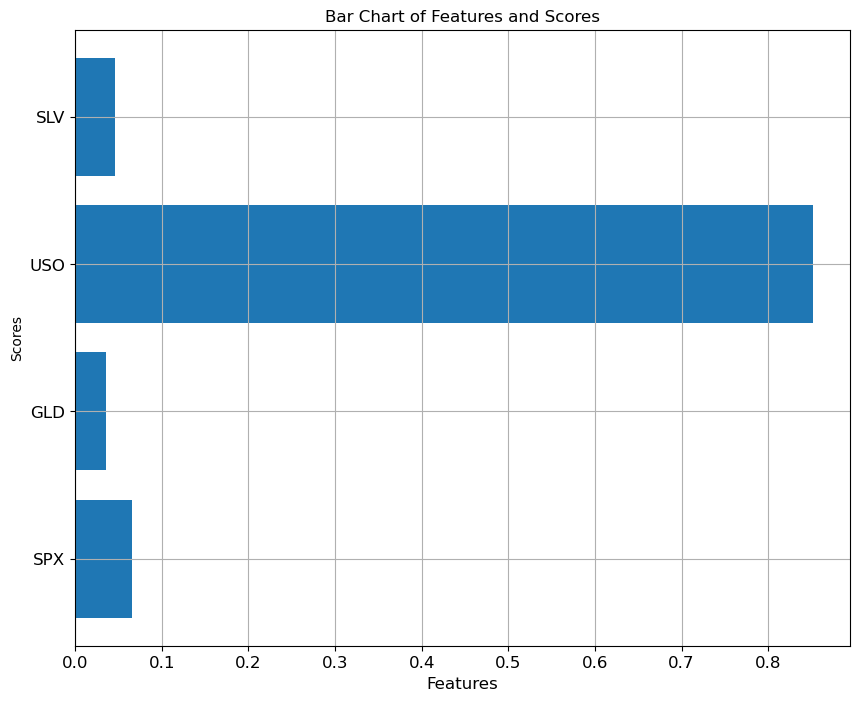

In [42]:
plt.figure(figsize=(10, 8))
plt.barh(X["features"], X["Scores"])
plt.xlabel("Features", fontsize=12)
plt.ylabel("Scores")
plt.title("Bar Chart of Features and Scores")
plt.xticks(c="k", fontsize=12)
plt.yticks(c="k", fontsize=12)
plt.grid(True)
plt.show()


In [71]:
test_predictions = Rand_reg.predict(X_test_final)  

In [82]:
pd.DataFrame(np.c_[test_predictions , y_test] , columns=["prediction" , "actual"])

prediction    actual
0      1.422238  1.471800
1      1.229779  1.232970
2      1.175999  1.177579
3      1.350913  1.362175
4      1.427151  1.409900
..          ...       ...
453    1.319453  1.322401
454    1.190542  1.195929
455    1.193262  1.194172
456    1.113280  1.106293
457    1.108928  1.114082

[458 rows x 2 columns]

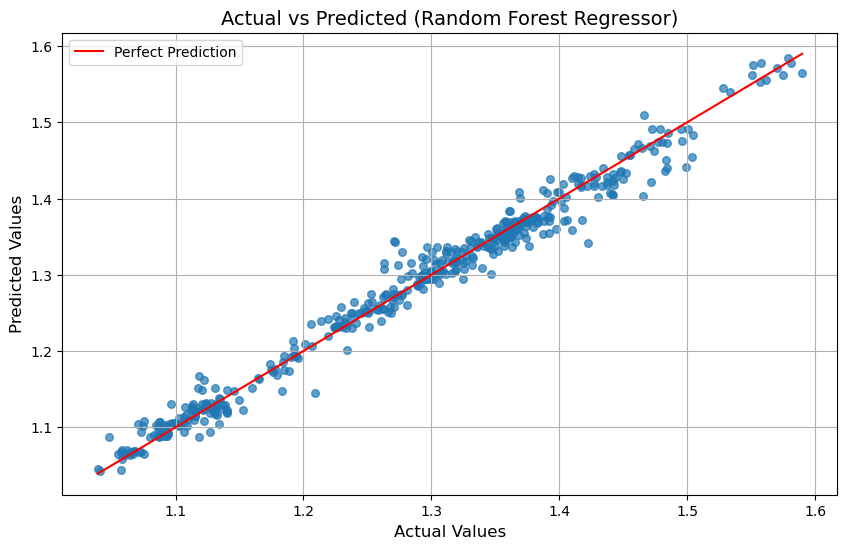

In [80]:
plt.figure(figsize=(10, 6))  
plt.scatter(y_test, test_predictions, s=30, alpha=0.7)
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_test, 1))(np.unique(y_test)),
         color='red', label='Perfect Prediction')

plt.legend()
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Actual vs Predicted (Random Forest Regressor)", fontsize=14)
plt.grid(True)
plt.show()


## XGBRegressor

In [43]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train_final , y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [44]:
cross_val_xgb = cross_val_score(estimator=xgb_reg , X=X_train_final , y=y_train ,
                            cv=5 , scoring="neg_mean_squared_error" , n_jobs=-1)

 
print("Score is ==>>\n ",abs(cross_val_xgb))

print("cross val score mean is ==>> ",cross_val_xgb.mean() * -1)

Score is ==>>
  [0.00035002 0.00038489 0.00033603 0.00052643 0.00036647]
cross val score mean is ==>>  0.00039276863998945026


In [45]:
# Make cross-validation predictions
cross_val_pred = cross_val_predict(estimator=xgb_reg, X=X_train_final, y=y_train,
                                   cv=5, method="predict", n_jobs=-1)



# Calculate mean squared error
mse =np.sqrt(mean_squared_error(y_train, cross_val_pred))
# Print the MSE
print(f"The mean squared error is {mse:.4f}")

The mean squared error is 0.0198


In [46]:
param_xgb = {
     "n_estimators" : np.arange(50, 200, 10),
    "max_depth" : np.arange(2, 10, 1),
    "learning_rate" : np.arange(0.1, 1, 0.1),
    "subsample" : np.arange(0.2, 1, 0.25),
    "alpha" :  np.arange(0.1, 1, 0.1)
}

grid_xgb = RandomizedSearchCV(estimator=xgb_reg , param_distributions=param_xgb , n_jobs=-1 ,
                    verbose=6 , n_iter=500 , cv=5 , scoring="neg_mean_squared_error")
grid_xgb.fit(X_train_final , y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                   n_iter=500, n_jobs=-1,
                   param_distributions={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190]),
                                        'subsample': array([0.2 , 0.45, 0.7 , 0.95])},
                   scoring='neg_mean_squared_error', verbose=6)

In [47]:
pest_para = grid_xgb.best_params_
pest_para

{'subsample': 0.7,
 'n_estimators': 160,
 'max_depth': 9,
 'learning_rate': 0.1,
 'alpha': 0.1}

In [48]:
best_est = grid_xgb.best_estimator_
best_est

XGBRegressor(alpha=0.1, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=160, n_jobs=None,
             num_parallel_tree=None, ...)

In [49]:
cross_val_xgb_sc = cross_val_score(estimator=grid_xgb , X=X_train_final , y=y_train ,
                            cv=5 , scoring="neg_mean_squared_error" , n_jobs=-1)

 
print("Score is ==>>\n ",abs(cross_val_xgb_sc))

print("cross val score mean is ==>> ",cross_val_xgb_sc.mean() * -1)

Score is ==>>
  [0.00034485 0.00037754 0.00031698 0.00048869 0.00035448]
cross val score mean is ==>>  0.0003765071417536627


In [50]:
# Make cross-validation predictions
cross_val_pred_xgb = cross_val_predict(estimator=grid_xgb, X=X_train_final, y=y_train,
                                   cv=5, method="predict", n_jobs=-1)

# Calculate mean squared error
mse = np.sqrt(mean_squared_error(y_train, cross_val_pred_xgb))

# Print the MSE
print(f"The mean squared error is {mse:.4f}")

The mean squared error is 0.0193


In [51]:
feat_import_forst = {}
for name , score in zip(col_nums , best_est.feature_importances_[:17]):
    feat_import_forst[name] = score

    
keys_forst = feat_import_forst.keys()
values_forst = feat_import_forst.values()

pd.DataFrame({"features" : keys_forst , "Scores" : values_forst})


features    Scores
0      SPX  0.053777
1      GLD  0.035254
2      USO  0.868261
3      SLV  0.042709

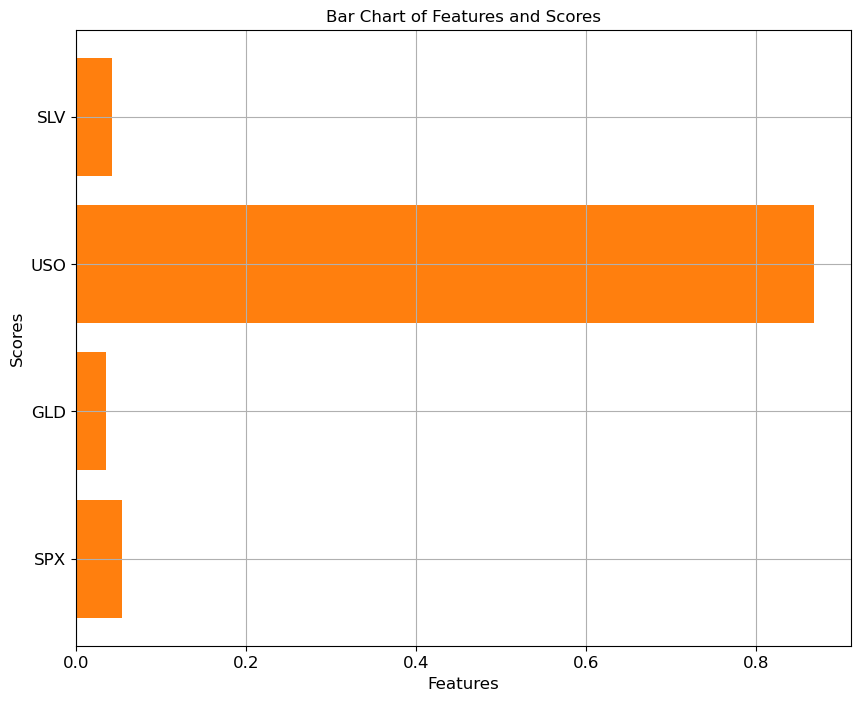

In [52]:
plt.figure(figsize=(10,8))
x = pd.DataFrame({"features": keys_forst, "Scores": values_forst})
plt.barh(y=x["features"], width=x["Scores"])  

plt.barh(y=x["features"], width=x["Scores"])  
plt.xlabel("Features", fontsize=12)
plt.ylabel("Scores" , fontsize=12)
plt.title("Bar Chart of Features and Scores")
plt.xticks(c="k", fontsize=12)
plt.yticks(c="k", fontsize=12)
plt.grid(True)
plt.show()


## Using Deep Learning (ANN)

In [59]:
# setting up the layers of Neural Network

model = Sequential([  
                          layers.Flatten(input_shape=(4,)),
                          layers.Dense(20, activation='relu'),
                          layers.Dense(4, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 4)                 0         
                                                                 
 dense_2 (Dense)             (None, 20)                100       
                                                                 
 dense_3 (Dense)             (None, 4)                 84        
                                                                 
Total params: 184 (736.00 Byte)
Trainable params: 184 (736.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:
# compiling the Neural Network

model.compile(optimizer="adam" ,
              loss="sparse_categorical_crossentropy" ,
              metrics=["accuracy"])

In [61]:
# training the Neural Network
history = model.fit(X_train_final , y_train , epochs=20 , validation_split=0.1)
history

Epoch 1/20
52/52 [==============================] - 1s 4ms/step - loss: 1.5140 - accuracy: 0.0000e+00 - val_loss: 1.1959 - val_accuracy: 0.0000e+00
Epoch 2/20
52/52 [==============================] - 0s 2ms/step - loss: 0.9393 - accuracy: 0.0000e+00 - val_loss: 0.7211 - val_accuracy: 0.0000e+00
Epoch 3/20
52/52 [==============================] - 0s 2ms/step - loss: 0.5469 - accuracy: 0.0000e+00 - val_loss: 0.4118 - val_accuracy: 0.0000e+00
Epoch 4/20
52/52 [==============================] - 0s 2ms/step - loss: 0.3106 - accuracy: 0.0000e+00 - val_loss: 0.2402 - val_accuracy: 0.0000e+00
Epoch 5/20
52/52 [==============================] - 0s 2ms/step - loss: 0.1849 - accuracy: 0.0000e+00 - val_loss: 0.1503 - val_accuracy: 0.0000e+00
Epoch 6/20
52/52 [==============================] - 0s 2ms/step - loss: 0.1196 - accuracy: 0.0000e+00 - val_loss: 0.1018 - val_accuracy: 0.0000e+00
Epoch 7/20
52/52 [==============================] - 0s 2ms/step - loss: 0.0830 - accuracy: 0.0000e+00 - val_loss

In [62]:
loss, accuracy = model.evaluate(X_test_final, y_test)
print("loss is == " , np.round(loss , 4))

15/15 [==============================] - 0s 1ms/step - loss: 0.0072 - accuracy: 0.0000e+00
loss is ==  0.0072


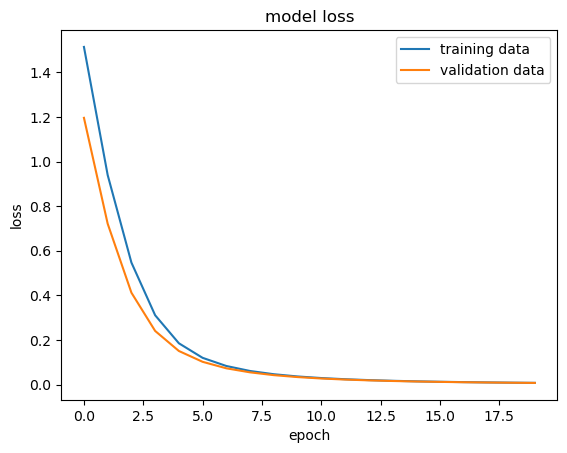

In [63]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [65]:
pred = model.predict(X_test_final)
pred

15/15 [==============================] - 0s 2ms/step


array([[1.3164561e-03, 9.9501848e-01, 2.6614075e-03, 1.0035615e-03],
       [1.1690199e-04, 9.9963260e-01, 1.2853248e-04, 1.2187655e-04],
       [3.1485781e-04, 9.9907279e-01, 3.0373514e-04, 3.0862511e-04],
       ...,
       [1.1832234e-04, 9.9963677e-01, 1.1925604e-04, 1.2554873e-04],
       [2.8197393e-03, 9.9262577e-01, 1.9439562e-03, 2.6104376e-03],
       [1.5828909e-03, 9.9574345e-01, 1.3917424e-03, 1.2818815e-03]],
      dtype=float32)

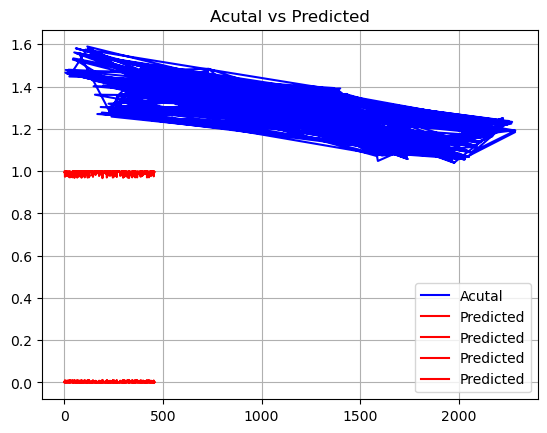

In [77]:
plt.plot(y_test, color = 'blue', label = 'Acutal')
plt.plot(pred , color = 'red', label = 'Predicted')
plt.grid(0.3)
plt.title('Acutal vs Predicted')
plt.legend()
plt.show()

# END

# BY : SAYED ALI